In [124]:
from sympy import Matrix, init_printing

init_printing()

In [141]:
def words(avoiding, ones, zeros):
    
    a = len(avoiding)
    
    def W(word, ones, zeros): 
        
        if ones:
            one = ones[0]
            new_word = word + [one]
            if new_word[-a:] != avoiding: yield from W(new_word, ones[1:], zeros)
        
        if zeros:
            zero = zeros[0]
            new_word = word + [zero]
            if new_word[-a:] != avoiding: yield from W(new_word, ones, zeros[1:])
        
        if not ones and not zeros: yield word
        
    
    return W([], ones, zeros)
    

In [142]:
w_1, w_0 = 3, 2
sorted(words(avoiding=[1,1,0], ones=[1]*w_1, zeros=[0]*w_0))

In [143]:
{w_0: [w for w in words(avoiding=[1,1,0], ones=[1]*w_1, zeros=[0]*w_0)] for w_0 in range(w_1+1)}

In [144]:
class avoiding:
    
    def __init__(self, pattern, generator):
        self.pattern = pattern
        self.generator = generator
        
    def __call__(self, f):
        
        def F(n, j, *args, **kwds):
            T = {}
            for w_1 in n:
                for j_point in j:
                    pattern = self.pattern(j_point)
                    T[w_1,j_point] = {w_0: [w for w in self.generator(avoiding=pattern, 
                                                                      ones=[1]*w_1, zeros=[0]*w_0)] 
                              for w_0 in range(w_1+1)}
            
            return [fn(T, n, j) for fn in f()]
        
        return F

In [146]:
def pprint_words(subtable):
    words = [w for w_0, words in subtable.items() for w in words]
    return sorted({''.join(map(str, w)) for w in words}, key=len)

def to_matrix(table, n, j):
    return Matrix(len(j), len(n), lambda z, w: sum(len(words) for w_0, words in table[w, z].items()))

def identity(table, n, j):
    return table

$\mathfrak{p}=1^{j+1}0^{j}$

In [147]:
@avoiding(pattern=lambda j: [1]*(j+1) + [0]*j, generator=words)
def ones_then_zeros_words(): return [identity, to_matrix]

In [148]:
binary_words, matrix = ones_then_zeros_words(n=range(11), j=range(10))

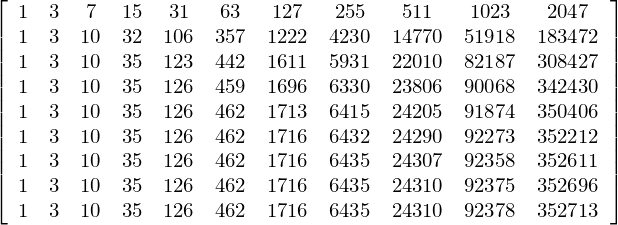

In [149]:
matrix[1:,:]

In [150]:
binary_words[3,1]

In [151]:
pprint_words(binary_words[3,1])

['111',
 '0111',
 '1011',
 '10011',
 '00111',
 '01011',
 '10101',
 '101010',
 '100011',
 '100101',
 '101001',
 '010101',
 '000111',
 '001011',
 '010011']

In [152]:
len(_)

$\mathfrak{p}=0^{j}1^{j}$

In [157]:
@avoiding(pattern=lambda j: [0]*j + [1]*j, generator=words)
def ones_then_zeros_words(): return [identity, to_matrix]

In [158]:
binary_words, matrix = ones_then_zeros_words(n=range(11), j=range(10))

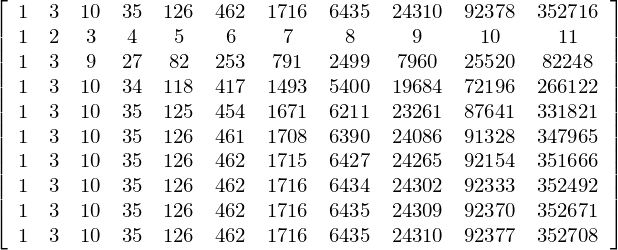

In [159]:
matrix[:,:]

$\mathfrak{p}=0^{j+1}1^{j}$

In [153]:
@avoiding(pattern=lambda j: [0]*(j+1) + [1]*j, generator=words)
def ones_then_zeros_words(): return [identity, to_matrix]

In [154]:
binary_words, matrix = ones_then_zeros_words(n=range(11), j=range(10))

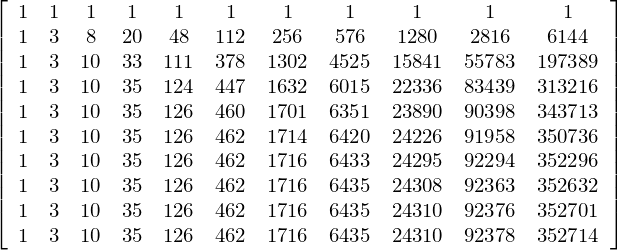

In [156]:
matrix[:,:]

$\mathfrak{p}=(10)^{j}1$

In [161]:
@avoiding(pattern=lambda j: [1,0]*j + [1], generator=words)
def ones_then_zeros_words(): return [identity, to_matrix]

In [162]:
binary_words, matrix = ones_then_zeros_words(n=range(11), j=range(10))

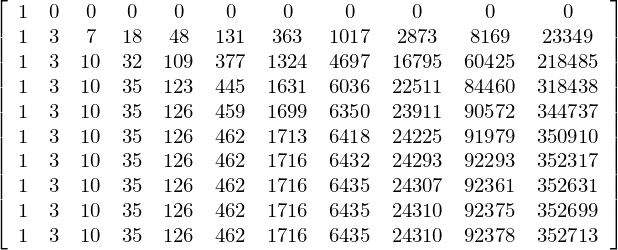

In [163]:
matrix[:,:]

$\mathfrak{p}=(01)^{j}0$

In [164]:
@avoiding(pattern=lambda j: [0,1]*j + [0], generator=words)
def ones_then_zeros_words(): return [identity, to_matrix]

In [165]:
binary_words, matrix = ones_then_zeros_words(n=range(11), j=range(10))

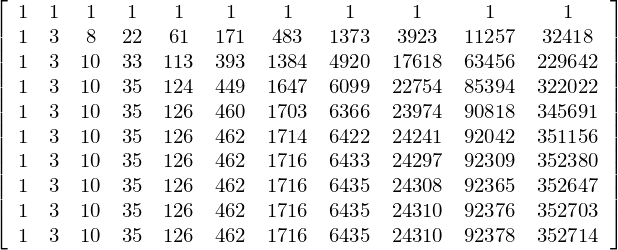

In [166]:
matrix[:,:]